In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import us2s_OV_CA
import sys

In [2]:
def plot_fundamental(ax, model, density, flow):
    ax.set_xlabel("Density")
    ax.set_ylabel("Flow")
    ax.set_xlim((0, 1.0))
    ax.set_ylim((0, 1.0))
    ax.grid()
    ax.set_title(
        "n0={}, v0={}"
        .format(model.n_0, model.v_0)
    )
    ax.scatter(density, flow, s=5)

In [3]:
L = 100
x_0 = 1
dt = 1
n_max = 1100
n_0_list = [3, 3, 2, 4]
v_0_list = [2, 4, 3, 3]

K =   24

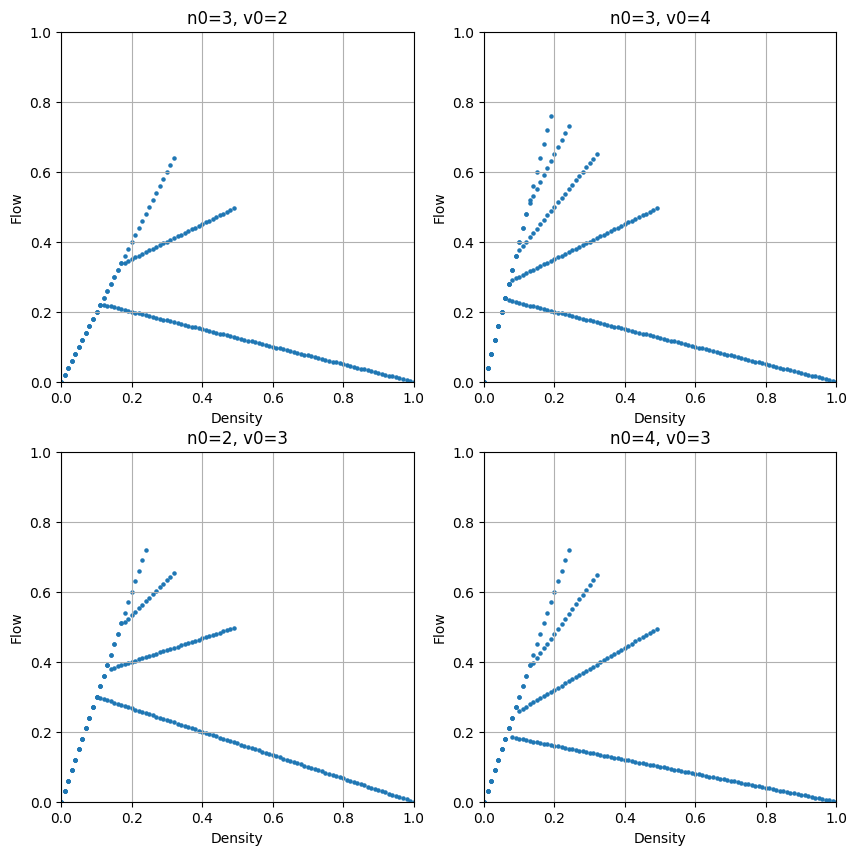

In [6]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

axs = [ax1, ax2, ax3, ax4]


for ax, n_0, v_0 in zip(axs, n_0_list, v_0_list):
	density = []
	flow = []
	for vmin in range(v_0 + 1):
		# 最低速度がvminである状況を作る
		for K in range(101 // (vmin + 1)):
			sys.stdout.write("\rK = {:4d}".format(K))
			sys.stdout.flush()
			model = us2s_OV_CA.us2s_OV_CA(
				L=L,
				K=K,
				n_0=n_0,
				v_0=v_0,
				x_init=[(vmin + 1) * i for i in range(K)],
				n_max=1100,
				x_0=x_0,
				dt=dt
			)
			model.simulate()
			density.append(model.density())
			flow.append(model.flow(800, 800 + model.n_0))
	plot_fundamental(ax, model, density, flow)